In [2]:
import pandas as pd
import numpy as np
import requests
import re
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup



In [3]:
with open("bostoncars1.html") as file_reader:
    soup = BeautifulSoup(file_reader, 'html.parser')

In [4]:
carcontent = soup.findAll("p", {"class": "result-info"})

In [5]:
listingInfo = []
for car in carcontent:
    listing = {}
    listing['Title'] = car.find("a", {"class":"result-title hdrlnk"})
    listing["Price"] = car.find("span", {'class':'result-price'})
    hood = car.find("span", {"class":'result-hood'})
    listing['Neighborhood'] = hood
    listingInfo.append(listing)
    
listingPage = pd.DataFrame(listingInfo)

listingPage

,Title,Price,Neighborhood
0,[08 BMW 128i Convertible (E88)],[$9500],[ (Peabody)]
1,[2010 Honda CRV EX-L],[$8500],[ (Duxbury)]
2,[2011 Nissan Rogue],[$7500],[ (Watertown)]
3,[1954 Chrysler New Yorker Hemi Deluxe],[$14900],[ (belchertown)]
4,[2008 Ford Crown Vic P71 Police Interceptor],[$4500],[ (Wakefield)]
...,...,...,...
115,[Bmw 750li],[$14300],[ (Hanover Ma)]
116,[Volkswagen passat AWD],[$1600],None
117,[2005 Subaru Legacy Outback 2.5i / Celery Green],[$6000],[ (Topsfield)]
118,[2005 JEEP GRANDE CHEROKEE . NO MECHANIC ISSUE...,[$2850],[ (Billerica)]


In [6]:
searchPop = "search/cto?query=CARS&sort=rel&min_price=100&max_price=150000"

usa_df = pd.read_excel(open('craigslistUSA.xlsx', 'rb'), sheet_name = 'Sheet1')
usa_df['link'] = usa_df['link'].astype(str) + searchPop

usa_df

,state,area,link
0,AK,anchorage / mat-su,https://anchorage.craigslist.org/search/cto?qu...
1,AK,"fairbanks, AK",https://fairbanks.craigslist.org/search/cto?qu...
2,AK,southeast alaska,https://juneau.craigslist.org/search/cto?query...
3,AK,little rock,https://littlerock.craigslist.org/search/cto?q...
4,AK,kenai peninsula,https://kenai.craigslist.org/search/cto?query=...
...,...,...,...
408,WV,"morgantown, WV",https://morgantown.craigslist.org/search/cto?q...
409,WV,southern WV,https://swv.craigslist.org/search/cto?query=CA...
410,WV,eastern panhandle,https://martinsburg.craigslist.org/search/cto?...
411,WV,huntington-ashland,https://huntington.craigslist.org/search/cto?q...


In [32]:
def createDF(link, state):
    response = requests.get(link)
    soup = BeautifulSoup(response.text, 'lxml')
    carcontent = soup.findAll('p', {'class':'result-info'})
    listingInfo = []
    for car in carcontent:
        listing = {}
        listing['Title'] = car.find("a", {"class":"result-title hdrlnk"}).text
        listing["Price"] = int(car.find("span", {'class':'result-price'}).text.replace('$',''))
        hood = car.find('span', {"class":'result-hood'})
        listing['Neighborhood'] = hood.text.replace('(','').replace(')','') if hood else None
        listing['State'] = state
        listingInfo.append(listing)
    listingPage = pd.DataFrame(listingInfo)
    return(listingPage)



    
    
    
    

In [33]:
def mergeStateDF(stateName, state_df, usa_df):
    for index,row in usa_df.iterrows():
        if(row['state'] == stateName):
            temp_df = createDF(row['link'], stateName)
            state_df = pd.concat([state_df,temp_df])
            temp_df = temp_df.iloc[0:0]
    return(state_df)

In [35]:
usa_df.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'QA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [36]:
ak_df = pd.DataFrame()
al_df = pd.DataFrame()
ar_df = pd.DataFrame()
az_df = pd.DataFrame()
ca_df = pd.DataFrame()
co_df = pd.DataFrame()
ct_df = pd.DataFrame()
dc_df = pd.DataFrame()
de_df = pd.DataFrame()
fl_df = pd.DataFrame()
ga_df = pd.DataFrame()
hi_df = pd.DataFrame()
ia_df = pd.DataFrame()
id_df = pd.DataFrame()
il_df = pd.DataFrame()
in_df = pd.DataFrame()
ks_df = pd.DataFrame()
ky_df = pd.DataFrame()
la_df = pd.DataFrame()
ma_df = pd.DataFrame()
md_df = pd.DataFrame()
me_df = pd.DataFrame()
mi_df = pd.DataFrame()
mn_df = pd.DataFrame()
mo_df = pd.DataFrame()
ms_df = pd.DataFrame()
mt_df = pd.DataFrame()
nc_df = pd.DataFrame()
nd_df = pd.DataFrame()
ne_df = pd.DataFrame()
nh_df = pd.DataFrame()
nj_df = pd.DataFrame()
nm_df = pd.DataFrame()
nv_df = pd.DataFrame()
ny_df = pd.DataFrame()
oh_df = pd.DataFrame()
ok_df = pd.DataFrame()
or_df = pd.DataFrame()
pa_df = pd.DataFrame()
qa_df = pd.DataFrame()
ri_df = pd.DataFrame()
sc_df = pd.DataFrame()
sd_df = pd.DataFrame()
tn_df = pd.DataFrame()
tx_df = pd.DataFrame()
ut_df = pd.DataFrame()
va_df = pd.DataFrame()
vt_df = pd.DataFrame()
wa_df = pd.DataFrame()
wi_df = pd.DataFrame()
wv_df = pd.DataFrame()
wy_df = pd.DataFrame()

In [37]:
ak_df = mergeStateDF('AK', ak_df, usa_df)
al_df = mergeStateDF('AL', al_df, usa_df)
ar_df = mergeStateDF('AR', ar_df, usa_df)
az_df = mergeStateDF('AZ', az_df, usa_df)

In [39]:
ca_df = mergeStateDF('CA', ca_df, usa_df)

In [40]:
co_df = mergeStateDF('CO', co_df, usa_df)
ct_df = mergeStateDF('CT', ct_df, usa_df)
dc_df = mergeStateDF('DC', dc_df, usa_df)
de_df = mergeStateDF('DE', de_df, usa_df)

In [41]:
fl_df = mergeStateDF('FL', fl_df, usa_df)
ga_df = mergeStateDF('GA', ga_df, usa_df)
hi_df = mergeStateDF('HI', hi_df, usa_df)
ia_df = mergeStateDF('IA', ia_df, usa_df)
id_df = mergeStateDF('ID', id_df, usa_df)

In [42]:
il_df = mergeStateDF('IL', il_df, usa_df)
in_df = mergeStateDF('IN', in_df, usa_df)
ks_df = mergeStateDF('KS', ks_df, usa_df)
ky_df = mergeStateDF('KY', ky_df, usa_df)

In [43]:
la_df = mergeStateDF('LA', la_df, usa_df)
ma_df = mergeStateDF('MA', ma_df, usa_df)
md_df = mergeStateDF('MD', md_df, usa_df)

In [44]:
me_df = mergeStateDF('ME', me_df, usa_df)
mi_df = mergeStateDF('MI', ma_df, usa_df)
mn_df = mergeStateDF('MN', mn_df, usa_df)
mo_df = mergeStateDF('MO', mo_df, usa_df)

In [45]:
ms_df = mergeStateDF('MS', ms_df, usa_df)
mt_df = mergeStateDF('MT', mt_df, usa_df)
nc_df = mergeStateDF('NC', nc_df, usa_df)
nd_df = mergeStateDF('ND', nd_df, usa_df)
ne_df = mergeStateDF('NE', ne_df, usa_df)

In [46]:
nh_df = mergeStateDF('NH', nh_df, usa_df)
nj_df = mergeStateDF('NJ', nj_df, usa_df)
nm_df = mergeStateDF('NM', nm_df, usa_df)
nv_df = mergeStateDF('NV', nv_df, usa_df)

In [47]:
ny_df = mergeStateDF('NY', ny_df, usa_df)
oh_df = mergeStateDF('OH', oh_df, usa_df)
ok_df = mergeStateDF('OK', ok_df, usa_df)

In [48]:
or_df = mergeStateDF('OR', or_df, usa_df)
pa_df = mergeStateDF('PA', pa_df, usa_df)
qa_df = mergeStateDF('QA', qa_df, usa_df)
ri_df = mergeStateDF('RI', ri_df, usa_df)

In [49]:
sc_df = mergeStateDF('SC', sc_df, usa_df)
sd_df = mergeStateDF('SD', sd_df, usa_df)
tn_df = mergeStateDF('TN', tn_df, usa_df)

In [50]:
tx_df = mergeStateDF('TX', tx_df, usa_df)
ut_df = mergeStateDF('UT', ut_df, usa_df)

In [51]:
va_df = mergeStateDF('VA', va_df, usa_df)
vt_df = mergeStateDF('VT', vt_df, usa_df)
wa_df = mergeStateDF('WA', wa_df, usa_df)

In [52]:
wi_df = mergeStateDF('WI', wi_df, usa_df)
wv_df = mergeStateDF('WV', wv_df, usa_df)
wy_df = mergeStateDF('WY', wy_df, usa_df)

In [53]:
tx_df

,Title,Price,Neighborhood,State
0,Cars,25000,Breckenridge,TX
1,Honda Civic CX Hatchback 2D,1800,abilene,TX
2,Prettiest Car In Town 2006 Mercedes SL 500,10775,Brownwood,TX
3,2000 Jeep Wrangler Sport and Accessories,16500,"Albany, Texas",TX
4,2001 lincoln town car,4000,Abilene,TX
...,...,...,...,...
115,Dodge caravan SE clean Texas Title 63.000 mile...,8500,None,TX
116,2006 BMW Z4 3.0i Convertible For Sale,8000,None,TX
117,1980 SWB Chevy Truck Square Body,1500,None,TX
118,2013 Smart Car fortwo,4400,None,TX


In [54]:
northeast_df = pd.concat([me_df, vt_df, ma_df, ny_df, ri_df, ct_df, pa_df, nj_df])
south_df = pd.concat([de_df, md_df, dc_df, wv_df, va_df, ky_df, tn_df, nc_df, sc_df, ga_df, fl_df, al_df,ms_df,la_df,ar_df,ok_df, tx_df])
midwest_df = pd.concat([oh_df, mi_df, in_df,il_df, wi_df, mo_df, ia_df, mn_df, nd_df, sd_df, ne_df, ks_df])
west_df = pd.concat([mt_df, qa_df,wy_df, co_df, nm_df, az_df, ut_df, id_df, nv_df, ca_df, or_df,wa_df])

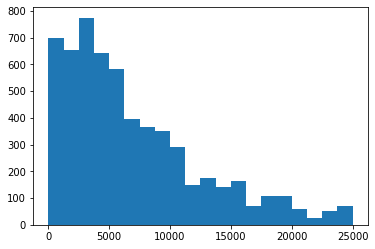

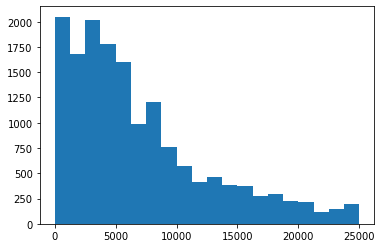

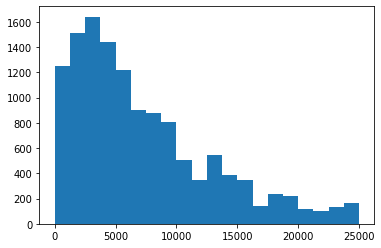

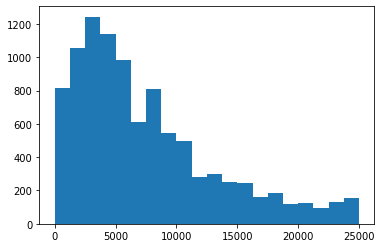

In [84]:
plt.hist(northeast_df['Price'], bins = 20, range = [0.0,  25000])
plt.show()
plt.hist(south_df['Price'], bins = 20, range = [0.0, 25000])
plt.show()
plt.hist(midwest_df['Price'], bins = 20, range = [0.0, 25000])
plt.show()
plt.hist(west_df['Price'], bins = 20, range = [0.0, 25000])
plt.show()

noertheast


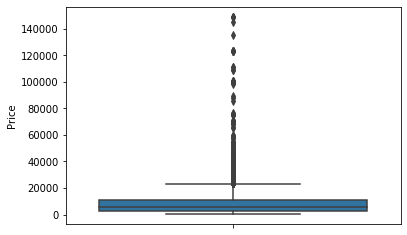

count      6208.000000
mean       9121.561856
std       12598.270207
min         100.000000
25%        2700.000000
50%        5500.000000
75%       10900.000000
max      149000.000000
Name: Price, dtype: float64


south


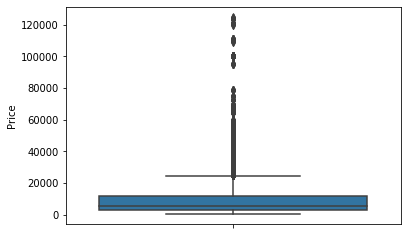

count     16989.000000
mean       9538.965919
std       12388.611358
min         100.000000
25%        2750.000000
50%        5600.000000
75%       11500.000000
max      125000.000000
Name: Price, dtype: float64


midwest


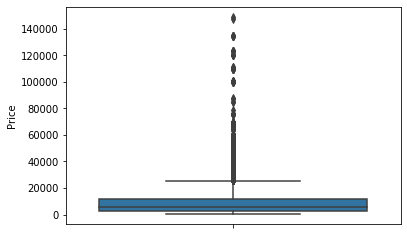

count     13788.000000
mean       9492.290760
std       11811.870585
min         123.000000
25%        2950.000000
50%        6000.000000
75%       12000.000000
max      149000.000000
Name: Price, dtype: float64


west


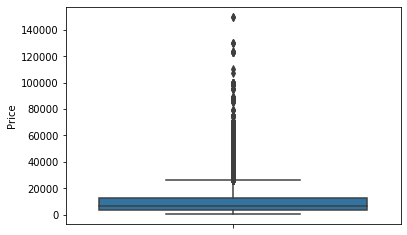

count     10612.000000
mean      10383.965605
std       12887.731176
min         100.000000
25%        3200.000000
50%        6500.000000
75%       12300.000000
max      150000.000000
Name: Price, dtype: float64



In [98]:
print('noertheast')
sns.boxplot(y=northeast_df.Price)
plt.show()
print(northeast_df.Price.describe())
print()
print()

print('south')
sns.boxplot(y=south_df.Price)
plt.show()
print(south_df.Price.describe())
print()
print()

print('midwest')
sns.boxplot(y=midwest_df.Price)
plt.show()
print(midwest_df.Price.describe())
print()
print()


print('west')
sns.boxplot(y=west_df.Price)
plt.show()
print(west_df.Price.describe())
print()

In [99]:
import seaborn as sns

# Distributions Between Regions

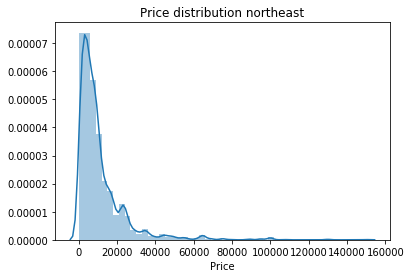

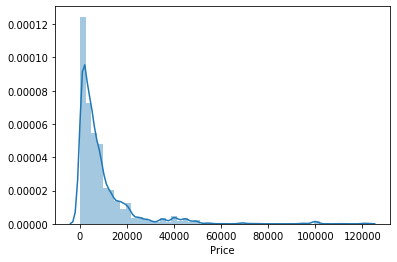

In [106]:
plt.title('Price distribution northeast')
sns.distplot(ca_df["Price"])
plt.show()
sns.distplot(tx_df["Price"])
plt.show()

